<h1>Analysis

_dir must have results

In [1]:
_dir = '/homedirec/user/fof_full3QFit_dialE/'
X_path = '/homedirec/user/X_aki_full_dialE.csv'
y_path = '/homedirec/user/y_aki_full_dialE.csv'
groups_path ='/homedirec/user/groups_aki_full_dialE.csv'
dx_path = '/homedirec/user/dxs_et_al.csv'

In [ ]:
from sklearn.calibration import calibration_curve

import pandas
import matplotlib.pyplot as plt
from plt_cv_res import plt_w, plot_coef
import plt_cv_res
reload(plt_cv_res)
import pickle
import numpy as np
import nice_plots

%matplotlib inline

In [ ]:
#plt.rcParams["font.family"] = "serif"
font = {'family': 'serif', 'size':'14'}
plt.rc('font', **font)
plt.rc('text', usetex=True)

For use down below:

In [ ]:
X = pandas.read_csv(X_path, index_col=0)
feat_names = X.columns
y = pandas.read_csv(y_path, index_col=0, header=None)
groups = pandas.read_csv(groups_path, index_col=0, header=None)

Obtain some summary results over the 50 iterations, for use below.

In [5]:
dxs_et_al = pandas.read_csv(dx_path, index_col=0)
dxs_et_al['y_other'] = list(y[1])
dxs_et_al['check'] = dxs_et_al['or'] - dxs_et_al['y_other']

agg_res = plt_cv_res.make_agg_res(_dir, dxs_et_al, y, groups)

<h2>Metrics

/home/user/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AUC Micro: 0.86737 $\pm\ $0.00566
AUC Macro: 0.86737 $\pm\ $0.00045
Brier Micro: 0.04901 $\pm\ $0.00179
Brier Macro: 0.04901 $\pm\ $8e-05
AUC Micro: 0.32568 $\pm\ $0.01502
AUC Macro: 0.32568 $\pm\ $0.0026


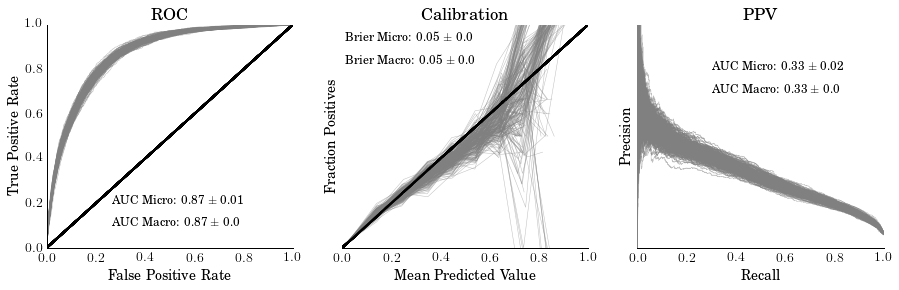

In [6]:
plt_cv_res.plt_perf(_dir,plt_first=1)

<h2>Features

See # feat nonzero

In [7]:
try: plt_cv_res.count_nonzero_feat('gbc', _dir=_dir)
except: pass
plt_cv_res.count_nonzero_feat('lr1', _dir=_dir)

num nonzero (if mean and std 0, then removed) gbc : 1454
num nonzero (if mean and std 0, then removed) lr1 : 1125


End # feat nonzero

In [1]:
# try: 
#     imP, longP, imN, longN, raw_col = plt_cv_res.plot_trials_coef(_dir=_dir, xlab='GBC Importance', es_name='gbc', plot_=0, n_coef=40, n_char=20000, figsize=(2.5,20), renamedP=None, renamedN=None)
#     pandas.options.display.max_colwidth = 100000000
#     print plt_cv_res.get_coef_table(imP).to_latex(bold_rows=True) #take from toprule to bottomrule
# except: 
#     pass

In [2]:
try:
    imP, longP, imN, longN, _ = plt_cv_res.plot_trials_coef(_dir=_dir, xlab ='LR1 Coefficient', es_name='lr1', n_coef=20, n_char=20000, plot_ = 0, figsize=(2.5,8), renamedP=None, renamedN=None)

    pandas.options.display.max_colwidth = 100000000
    print plt_cv_res.get_coef_table(imP).to_latex(bold_rows=True)
    print pandas.DataFrame({'a':[';'.join([el for el in longP])]}).to_latex()

    pandas.options.display.max_colwidth = 100000000
    print plt_cv_res.get_coef_table(imN).sort_values('mean', ascending=True).to_latex(bold_rows=True)
    print pandas.DataFrame({'a':[';'.join([el for el in longN])]}).to_latex()
except:
    pass

<h1>Further analyses

In [10]:
#plt.rcParams["font.family"] = "serif"
font = {'family': 'serif', 'size':'18'}
plt.rc('font', **font)
plt.rc('text', usetex=True)

<h1>STD by predicted prob

5618
84395


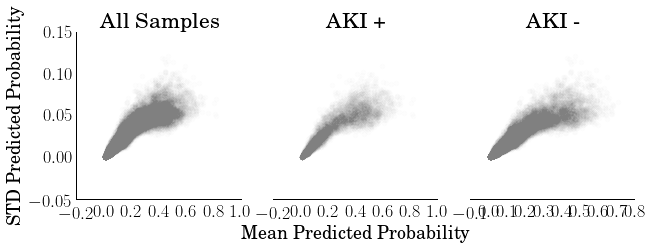

In [11]:
plt_cv_res.std_by_pp(agg_res, _dir)

<h2>Error by dx method

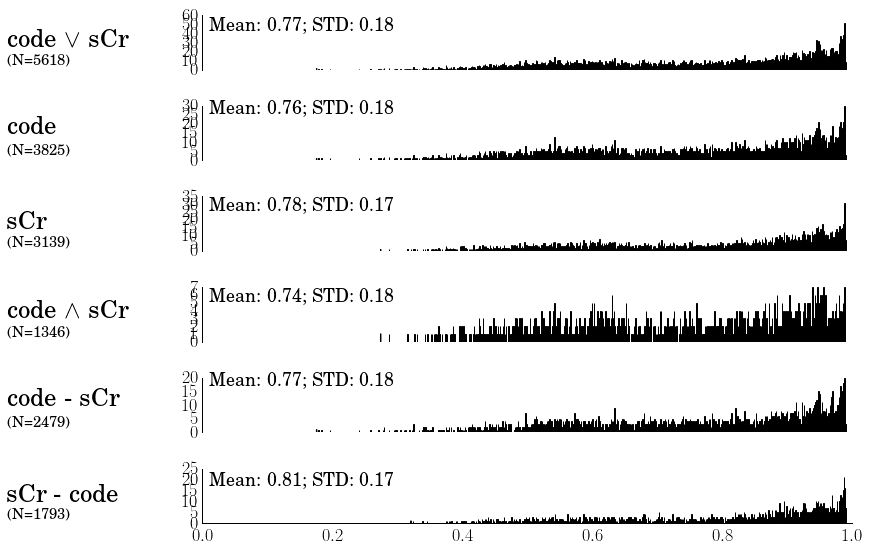

In [12]:
plt_cv_res.error_by_dx(agg_res, _dir)

<h1> Regression for errors (this was repeated with CV in batch script.  Here, it is just one fold)

In [13]:
reload(plt_cv_res)

<module 'plt_cv_res' from 'plt_cv_res.pyc'>

In [14]:
dxs = ['DX_','ETHN_','GENDER_','AGE_']*2
alphas = [1e-5]*4+[0.015]+[0]*3
multiplier = [1]*4 + [-1]*4

print dxs
print alphas
print multiplier

for outcome, tag_oi, alpha, multiplier in zip([0,0,0,0,1,1,1,1], dxs, alphas, [1,1,1,1,-1,-1,-1,-1]):


    (my_y, my_X, my_g, feat_names) = plt_cv_res.make_reg(X, agg_res, groups, outcome = outcome, 
                 multiplier=multiplier, data=X, tag_oi=tag_oi, _dir=_dir)
    #regr(my_X, my_y, my_g, feat_names, alpha=0.01)
    plt_cv_res.regr(agg_res, my_X, my_y, my_g, feat_names, alpha=1e-5)

['DX_', 'ETHN_', 'GENDER_', 'AGE_', 'DX_', 'ETHN_', 'GENDER_', 'AGE_']
[1e-05, 1e-05, 1e-05, 1e-05, 0.015, 0, 0, 0]
[1, 1, 1, 1, -1, -1, -1, -1]
saving to /homedirec/user/fof_full3QFit_dialE/contr_error/DX_/
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     imp l1
DX_584_ONE OF:[('5845', 'Acute kidney failure with lesion of tubular necrosis'), ('5846', 'Acute kidney failure with lesion of renal cortical necrosis'), ('5847', 'Acute kidney failure wit

<h2># hosp by error

In [15]:
from plt_cv_res import get_nhosp_per_id, agg_by_nhosp, utiliz

#hosp 90013
#pt 34505
num num hosp 85
#hosp 5618
#pt 3963
num num hosp 12
#hosp 84395
#pt 33120
num num hosp 80


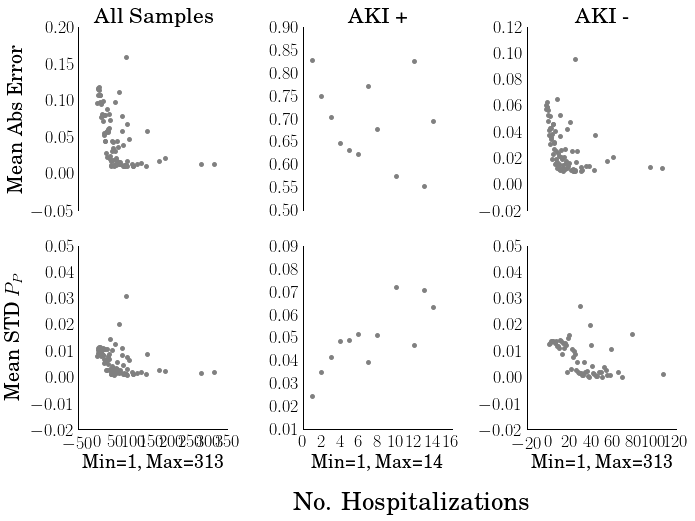

In [16]:
reload(plt_cv_res)
plt_cv_res.utiliz(agg_res, _dir)

<h1>By patient

In [5]:
#from plt_cv_res import by_pt
#by_pt(agg_res,_dir)

<h2>Res plot

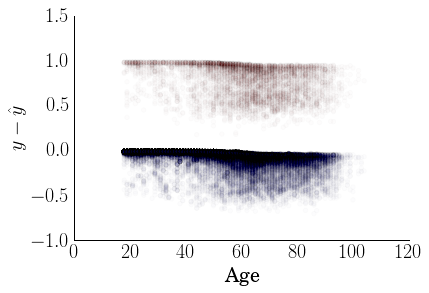

In [18]:
reload(nice_plots)
   
nice_plots.age_plt(X, agg_res,'/homedirec/user/fof_full3QFit_dialE/age_error.pdf')